In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE
import scipy.io
import os

from functions import *

## Import data

In [2]:
#Fake data
df = pd.DataFrame({})
regions = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "L"]

for i in range(len(regions)):
  df.insert(i, column=regions[i], value=np.random.laplace(size=int(1e6)))

In [3]:
#Open multiple dataset from "./data/" folder
datasets = []
for file in os.listdir("data"):
    try:
        data = scipy.io.loadmat("./data/" + file)
        data = pd.DataFrame(data["tseries"].T)
        datasets.append(data)
    except:
        print("Problem with \"" + str(file) + "\" file")

print("Uploaded " + str(len(datasets)) + " file")

Uploaded 96 file


## Single-dataset analysis

In [4]:
#42nd dataset as example
df = datasets[42]
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
1195,13581.449219,11393.600586,12211.963867,11104.995117,11732.625977,12448.721680,10804.381836,11568.866211,11659.625000,10458.022461,...,11978.264906,11654.908875,13098.418111,12510.470731,8976.746663,8109.716675,11498.583362,11164.004176,12908.126259,11677.407860
1196,13574.262695,11435.392578,12165.772461,11158.489258,11813.128906,12418.145508,10838.346680,11601.511719,11732.769531,10483.890625,...,12061.317789,11600.694963,13106.353729,12482.793708,9104.512006,8085.951311,11508.794683,11208.764984,12956.827597,11650.048106
1197,13564.376953,11419.376953,12171.232422,11147.748047,11798.538086,12420.848633,10824.766602,11565.976562,11705.176758,10494.071289,...,12124.084879,11657.540372,13058.476941,12461.930904,9003.510995,8188.947632,11553.680193,11151.371386,12970.774047,11739.714835
1198,13529.868164,11417.537109,12137.254883,11099.166016,11798.520508,12374.954102,10770.069336,11553.614258,11637.694336,10484.833984,...,12029.151607,11597.863262,13097.834510,12461.207594,8989.561466,8119.863610,11538.659258,11175.744686,12969.613818,11709.406568
1199,13614.111328,11439.223633,12130.485352,11139.552734,11818.432617,12407.934570,10810.071289,11600.670898,11643.098633,10487.114258,...,12068.864957,11647.194177,13100.984094,12449.265147,8968.554464,8045.656395,11555.169042,11140.762521,12951.371351,11685.898868


80


<AxesSubplot: >

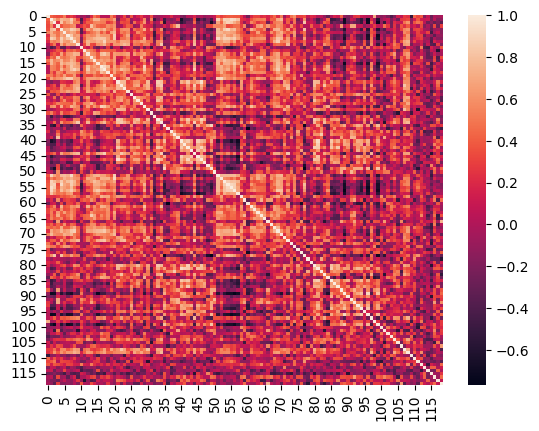

In [5]:
stream = dFC_stream(df, 15)
print(len(stream))

FC_0 = stream[0]
sn.heatmap(FC_0)

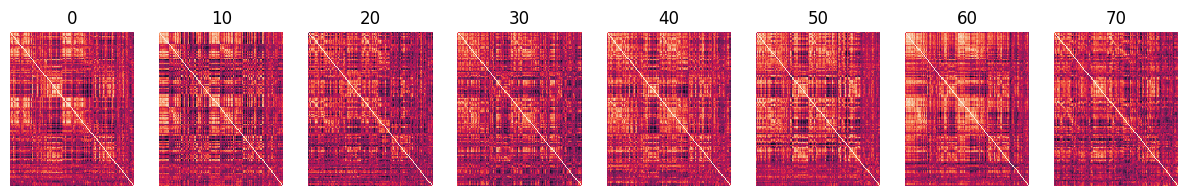

In [16]:
#Different points of dFC stream
t = [0, 10, 20, 30, 40, 50, 60, 70]

plt.figure(figsize=(17, 2))
str_idx = str(1) + str(len(t)+1)
for i in range(len(t)):
    plt.subplot(int(str_idx + str(i+1)))
    plt.title(str(t[i]))
    sn.heatmap(stream[i], cbar=False, xticklabels=False, yticklabels=False)

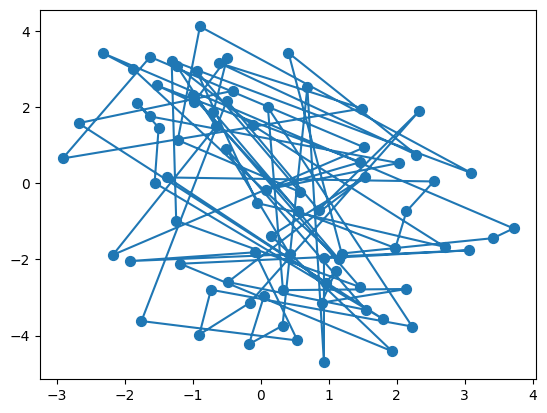

In [7]:
#Random walk with tSNE algorithm
random_walk = tSNE_evolution(stream, TSNE, 2)

plt.scatter(random_walk[0], random_walk[1], s=50)
plt.plot(random_walk[0], random_walk[1])

<AxesSubplot: >

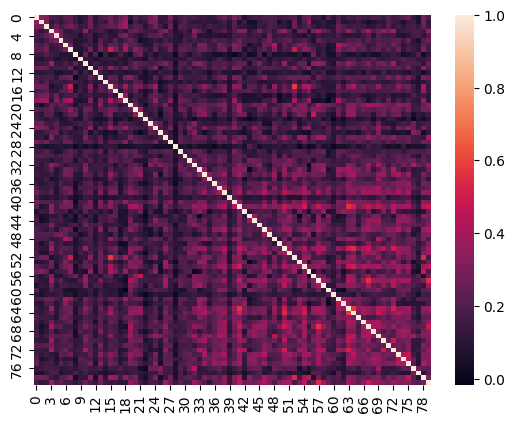

In [8]:
#dFC matrix
autocorrelation = dFC_matrix(stream)

sn.heatmap(autocorrelation)

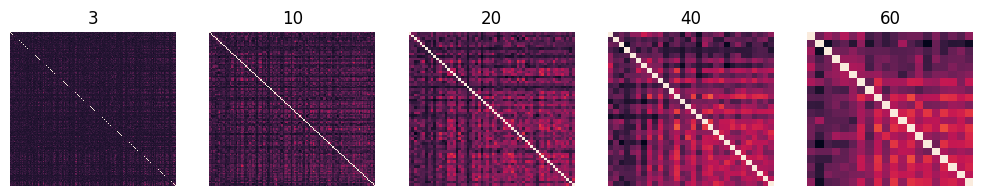

In [9]:
#Same dataset, dFC with different tau
tau = [3, 10, 20, 40, 60]

plt.figure(figsize=(15, 2))
str_idx = str(1) + str(len(tau)+1)
for i in range(len(tau)):
    stream = dFC_stream(df, tau[i])
    corr = dFC_matrix(stream)

    plt.subplot(int(str_idx + str(i+1)))
    plt.title(str(tau[i]))
    sn.heatmap(corr, cbar=False, xticklabels=False, yticklabels=False)

(array([ 67., 486., 810., 725., 483., 319., 182.,  59.,  22.,   7.]),
 array([-0.01609798,  0.04380002,  0.10369801,  0.16359601,  0.22349401,
         0.283392  ,  0.34329   ,  0.403188  ,  0.46308599,  0.52298399,
         0.58288199]),
 <BarContainer object of 10 artists>)

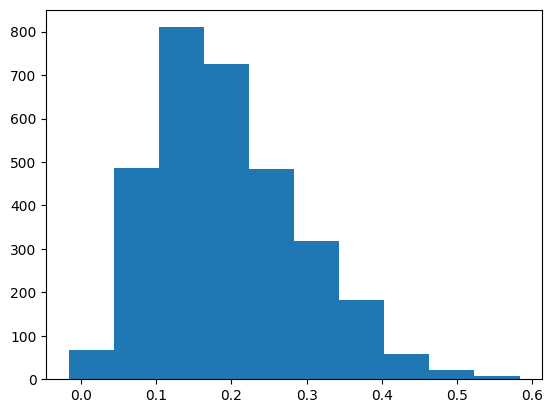

In [11]:
dFC_distribution = autocorrelation[np.triu_indices(autocorrelation.shape[1], k=1)]

plt.hist(dFC_distribution)

56


(array([ 5.,  2.,  7.,  7.,  6.,  7.,  5., 10.,  5.,  2.]),
 array([0.49121174, 0.53221032, 0.5732089 , 0.61420748, 0.65520606,
        0.69620464, 0.73720322, 0.7782018 , 0.81920038, 0.86019896,
        0.90119754]),
 <BarContainer object of 10 artists>)

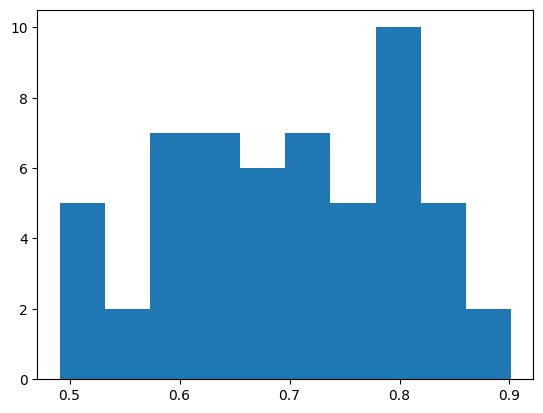

In [12]:
#Global speed distribution
v_dist = pooled_v_stream(df, 21, 21)
print(len(v_dist))

plt.hist(v_dist)

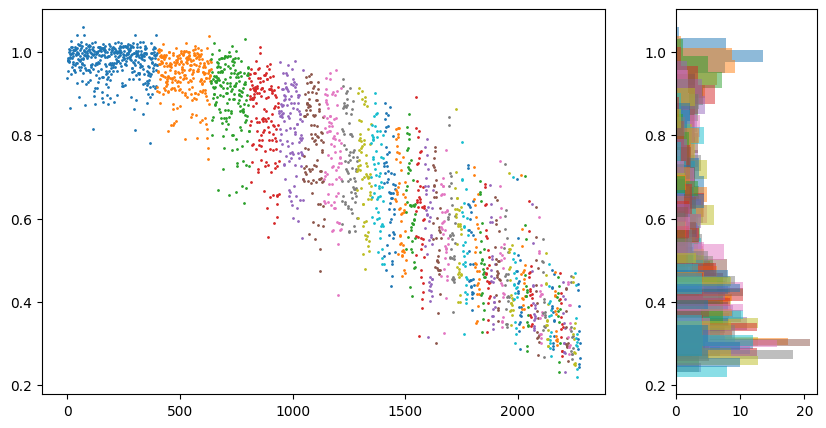

In [13]:
v = np.array([])

f, (a0, a1) = plt.subplots(1, 2, width_ratios=[4, 1], figsize=(10, 5))

for i in np.arange(3, 105, 2):
    #Get v_dist with tau=i
    v_i = pooled_v_stream(df, i, i)
    
    #Plot v(t) and hist(v)
    a0.scatter(np.arange(start=len(v), stop=(len(v)+len(v_i))), v_i, s=1)
    a1.hist(v_i, orientation='horizontal', alpha=0.5, density=True)

    #v is not used in this plot
    v = np.concatenate((v, v_i)) 

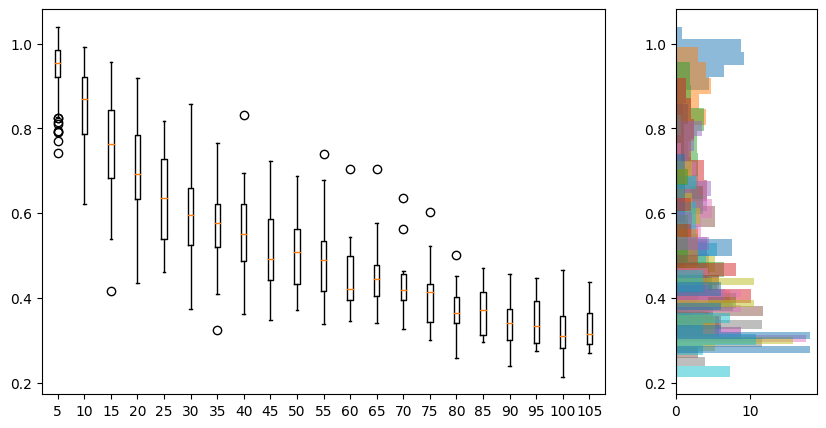

In [14]:
#Tau dependency in speed distribution

f, (a0, a1) = plt.subplots(1, 2, width_ratios=[4, 1], figsize=(10, 5))
a0.set_xlim([2, 108])

for i in np.arange(5, 106, 5):
    #Get v_dist with tau=i
    v_i = pooled_v_stream(df, i, i)
    
    #Plot v(t) and hist(v)
    a0.boxplot(v_i, positions=[i], widths=1)
    a1.hist(v_i, orientation='horizontal', alpha=0.5, density=True)

## More analysis

**ranges**:  *short* (3-8 TRs), *mid* (9-32 TRs), *long* (33-105 TRs) 

In [15]:
v_dist_global = np.array([])

for subject in datasets[70:75]:
    v_dist_single = pooled_v_stream(subject, 33, 105)
    v_dist_global = np.concatenate((v_dist_global, v_dist_single))

<Axes: ylabel='Density'>

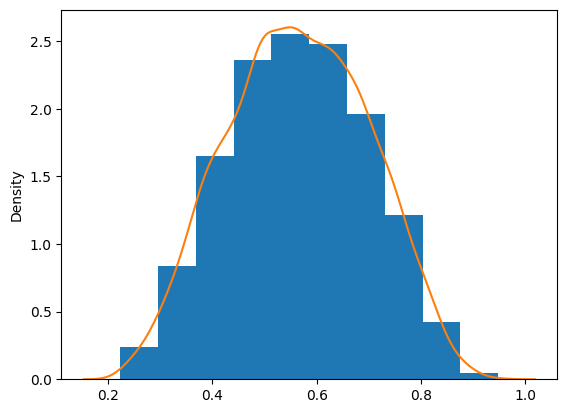

In [20]:
plt.hist(v_dist_global, density=True)
sn.kdeplot(v_dist_global)

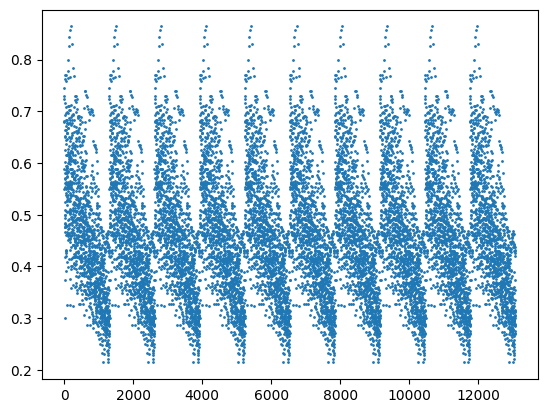

In [18]:
plt.scatter(np.arange(len(v_dist_global)), v_dist_global, s=1)

In [21]:
short_range = np.array([])

for subject in datasets:
    v_subject = pooled_v_stream(subject, 3, 8)
    short_range = np.concatenate((short_range, v_subject))

In [22]:
mid_range = np.array([])

for subject in datasets:
    v_subject = pooled_v_stream(subject, 9, 32)
    mid_range = np.concatenate((mid_range, v_subject))

In [23]:
long_range = np.array([])

for subject in datasets:
    v_subject = pooled_v_stream(subject, 33, 105)
    long_range = np.concatenate((long_range, v_subject))

(0.0, 1.1)

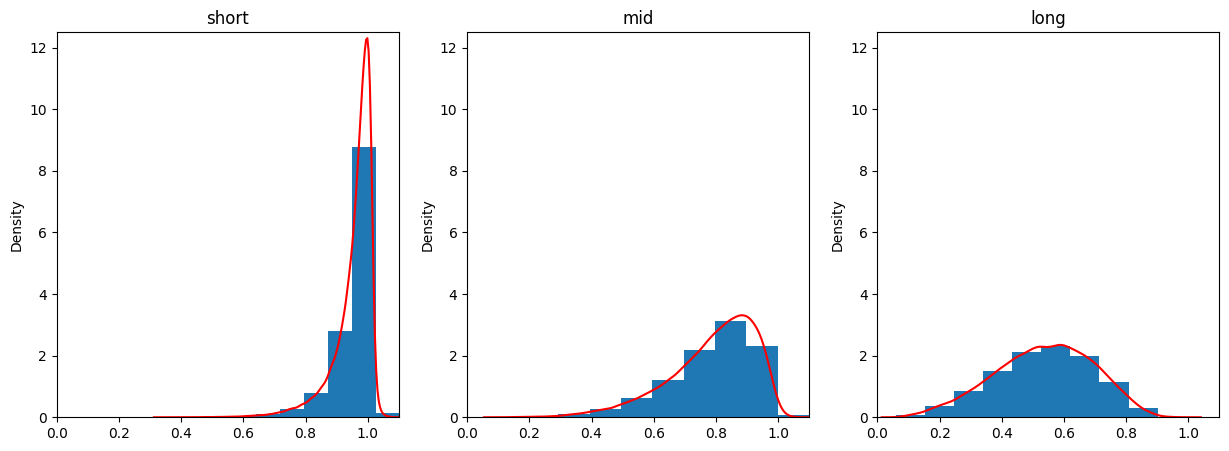

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title("short")
plt.hist(short_range, density=True)
sn.kdeplot(short_range, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

plt.subplot(132)
plt.title("mid")
plt.hist(mid_range, density=True)
sn.kdeplot(mid_range, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

plt.subplot(133)
plt.title("long")
plt.hist(long_range, density=True)
sn.kdeplot(long_range, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))